* https://altair-viz.github.io/
* https://www.youtube.com/watch?reload=9&v=ms29ZPUKxbU
* http://pbpython.com/altair-intro.html
* http://vallandingham.me/altair_intro.html
    

In [1]:
import altair as alt
from un_treaties import data
import un_treaties
import pandas as pd
from datetime import datetime, timedelta

In [2]:
type(data.as_dataframe())

pandas.core.frame.DataFrame

In [3]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [4]:
df_treaties = data.as_dataframe()

In [5]:
df_treaties.head(1)

,Unnamed: 0,ActionDate,ActionType,Chapter,Confirmation of signature ad referendum(C),Extension,Participant,Participation in the Agreement as amended under paragraph 4 of resolution 05-79 and paragraph 1 of article 60 of the unamended Agreement,Registration Number,Resolution,...,Treaty,TreatyDate,TreatyPlace,TreatyPlaceAndDate,UNTS Page,UNTS Volume,entryForce,pdf,registration,status
0,0,1945-09-24,Ratification,CHARTER OF THE UNITED NATIONS AND STATUTE OF T...,NaN,NaN,Argentina,NaN,NaN,NaN,...,1. Charter of the United Nations,26 June 1945,San Francisco,"San Francisco, 26 June 1945",NaN,NaN,"24 October 1945, in accordance with article 11...",Charter of the United Nations and Statute of t...,NaN,Parties : 49


In [6]:
df_treaties.columns

Index(['Unnamed: 0', 'ActionDate', 'ActionType', 'Chapter',
       'Confirmation of signature ad referendum(C)', 'Extension',
       'Participant',
       'Participation in the Agreement as amended under paragraph 4 of resolution 05-79 and paragraph 1 of article 60 of the unamended Agreement',
       'Registration Number', 'Resolution', 'Signature', 'Territories',
       'Treaty', 'TreatyDate', 'TreatyPlace', 'TreatyPlaceAndDate',
       'UNTS Page', 'UNTS Volume', 'entryForce', 'pdf', 'registration',
       'status'],
      dtype='object')

In [7]:
df_treaties["Treaty"].unique()[:5]

array(['1. Charter of the United Nations',
       '2. Declarations of Acceptance of the Obligations contained in the Charter of the United Nations - Admission of States to Membership in the United Nations in accordance with Article 4 of the Charter 1',
       '4. Declarations recognizing as compulsory the jurisdiction of the International Court of Justice under Article 36, paragraph 2, of the Statute of the Court',
       '5. a Amendments to Articles 23, 27 and 61 of the Charter of the United Nations, adopted by the General Assembly of the United Nations in resolutions 1991 A and B (XVIII) of 17 December 1963',
       '5. b Amendment to Article 109 of the Charter of the United Nations, adopted by the General Assembly of the United Nations in resolution 2101 (XX) of 20 December 1965'],
      dtype=object)

In [8]:
df_treaties['Participant'].unique()[:50]

array(['Argentina', 'Australia', 'Belarus', 'Belgium',
       'Bolivia, Plurinational State of', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Cuba', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Ethiopia', 'France', 'Greece', 'Guatemala', 'Haiti', 'Honduras',
       'India', 'Iran, Islamic Republic of', 'Iraq', 'Lebanon', 'Liberia',
       'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Norway', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Russian Federation', 'Saudi Arabia', 'South Africa',
       'Syrian Arab Republic', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States', 'Uruguay', 'Venezuela, Bolivarian Republic of',
       'Afghanistan'], dtype=object)

In [9]:
df_treaties['Chapter'].unique()

array(['CHARTER OF THE UNITED NATIONS AND STATUTE OF THE INTERNATIONAL COURT OF JUSTICE',
       'PACIFIC SETTLEMENT OF INTERNATIONAL DISPUTES',
       'PRIVILEGES AND IMMUNITIES, DIPLOMATIC AND CONSULAR RELATIONS, ETC',
       'HUMAN RIGHTS', 'REFUGEES AND STATELESS PERSONS',
       'NARCOTIC DRUGS AND PSYCHOTROPIC SUBSTANCES', 'TRAFFIC IN PERSONS',
       'OBSCENE PUBLICATIONS', 'HEALTH',
       'INTERNATIONAL TRADE AND DEVELOPMENT',
       'TRANSPORT AND COMMUNICATIONS', 'NAVIGATION',
       'ECONOMIC STATISTICS', 'EDUCATIONAL AND CULTURAL MATTERS',
       'STATUS OF WOMEN', 'FREEDOM OF INFORMATION', 'PENAL MATTERS',
       'COMMODITIES', 'MAINTENANCE OBLIGATIONS', 'LAW OF THE SEA',
       'COMMERCIAL ARBITRATION', 'LAW OF TREATIES', 'OUTER SPACE',
       'TELECOMMUNICATIONS', 'DISARMAMENT', 'ENVIRONMENT',
       'FISCAL MATTERS', 'MISCELLANEOUS'], dtype=object)

In [10]:
df_treaties['ActionType'].unique()

array(['Ratification', 'Registration Date', nan, 'Accession',
       'Succession', 'Application', 'Acceptance', 'Definitive Signature',
       'Notification'], dtype=object)

In [11]:
df = df_treaties.drop(['Unnamed: 0', 'Confirmation of signature ad referendum(C)', 'Extension', 'Registration Number', "Resolution", 'Territories',
                       'TreatyPlaceAndDate', 'UNTS Page', 'UNTS Volume',
                      'Participation in the Agreement as amended under paragraph 4 of resolution 05-79 and paragraph 1 of article 60 of the unamended Agreement'], axis=1)

In [12]:
nor = df[df['Participant'] == 'Norway']
swe = df[df['Participant'] == 'Sweden']
fra = df[df['Participant'] == 'France']

In [13]:
nor.groupby('ActionType').count()

,ActionDate,Chapter,Participant,Signature,Treaty,TreatyDate,TreatyPlace,entryForce,pdf,registration,status
ActionType,,,,,,,,,,,
Acceptance,39,39,39,1,39,39,39,39,39,29,39
Accession,29,29,29,0,29,29,29,29,29,29,29
Application,21,21,21,0,21,21,21,0,21,21,0
Definitive Signature,2,2,2,0,2,2,2,2,2,2,2
Notification,1,1,1,0,1,1,1,1,1,1,1
Ratification,96,105,105,10,105,105,105,105,105,99,104


In [14]:
swe.groupby('ActionType').count()

,ActionDate,Chapter,Participant,Signature,Treaty,TreatyDate,TreatyPlace,entryForce,pdf,registration,status
ActionType,,,,,,,,,,,
Acceptance,33,33,33,1,33,33,33,33,33,23,33
Accession,15,15,15,0,15,15,15,15,15,15,15
Application,18,18,18,0,18,18,18,0,18,18,0
Definitive Signature,10,10,10,0,10,10,10,10,10,10,10
Notification,1,1,1,0,1,1,1,1,1,1,1
Ratification,121,131,131,14,131,131,131,131,131,123,130
Registration Date,1,1,1,0,1,1,1,0,0,0,1


In [15]:
df.head()

,ActionDate,ActionType,Chapter,Participant,Signature,Treaty,TreatyDate,TreatyPlace,entryForce,pdf,registration,status
0,1945-09-24,Ratification,CHARTER OF THE UNITED NATIONS AND STATUTE OF T...,Argentina,NaN,1. Charter of the United Nations,26 June 1945,San Francisco,"24 October 1945, in accordance with article 11...",Charter of the United Nations and Statute of t...,NaN,Parties : 49
1,1945-11-01,Ratification,CHARTER OF THE UNITED NATIONS AND STATUTE OF T...,Australia,NaN,1. Charter of the United Nations,26 June 1945,San Francisco,"24 October 1945, in accordance with article 11...",Charter of the United Nations and Statute of t...,NaN,Parties : 49
2,1945-10-24,Ratification,CHARTER OF THE UNITED NATIONS AND STATUTE OF T...,Belarus,NaN,1. Charter of the United Nations,26 June 1945,San Francisco,"24 October 1945, in accordance with article 11...",Charter of the United Nations and Statute of t...,NaN,Parties : 49
3,1945-12-27,Ratification,CHARTER OF THE UNITED NATIONS AND STATUTE OF T...,Belgium,NaN,1. Charter of the United Nations,26 June 1945,San Francisco,"24 October 1945, in accordance with article 11...",Charter of the United Nations and Statute of t...,NaN,Parties : 49
4,1945-11-14,Ratification,CHARTER OF THE UNITED NATIONS AND STATUTE OF T...,"Bolivia, Plurinational State of",NaN,1. Charter of the United Nations,26 June 1945,San Francisco,"24 October 1945, in accordance with article 11...",Charter of the United Nations and Statute of t...,NaN,Parties : 49


In [16]:
df['ActionType'].unique()

array(['Ratification', 'Registration Date', nan, 'Accession',
       'Succession', 'Application', 'Acceptance', 'Definitive Signature',
       'Notification'], dtype=object)

In [17]:
!pwd


/home/patrick/Documents/dev/Altair_testing


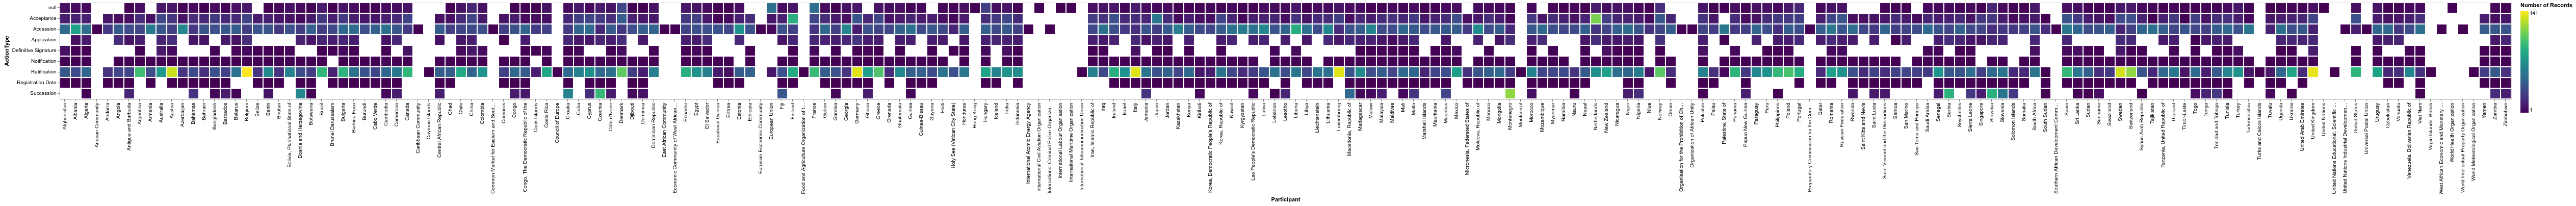

In [18]:
alt.Chart(df).mark_rect().encode(y=alt.Y('ActionType:N'),
                                  x=alt.X('Participant'),
                                  color='count()',
                                  tooltip='count()').interactive()
                                 

![](https://github.com/DataForGood-Norway/un_treaties/raw/master/images/ratification.png)

In [19]:
df.columns

Index(['ActionDate', 'ActionType', 'Chapter', 'Participant', 'Signature',
       'Treaty', 'TreatyDate', 'TreatyPlace', 'entryForce', 'pdf',
       'registration', 'status'],
      dtype='object')

In [20]:
df.Participant.unique().tolist()[:20]

['Argentina',
 'Australia',
 'Belarus',
 'Belgium',
 'Bolivia, Plurinational State of',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Ethiopia',
 'France',
 'Greece']

In [21]:
df['TreatyDate'].unique().tolist()[:20]

['26 June 1945',
 '24 October 1945',
 nan,
 '17 December 1963 1',
 '20 December 1965 1',
 '20 December 1971 1',
 '28 April 1949 1',
 '13 February 1946 1',
 '21 November 1947 1',
 '10 July 1948',
 '29 November 1948',
 '20 November 1959',
 '8 December 1965',
 '21 June 1948',
 '7 February 1949',
 '11 April 1949',
 '19 April 1949',
 '17 July 1948',
 '26 May 1950',
 '27 May 1957']

In [22]:
# Correct the 'TreatyDate' for weird parsed values like:
# 'New York, 11 December 1946',
#  '23 January 1912',
#  '11 February 1925 and Lake Success, New York, 11 December 1946 1',
#  '19 February 1925, and Lake Success, New York, 11 December 1946 1',
#  '19 February 1925',
#  '13 July 1931, and Lake Success, New York, 11 December 1946 1',

# get ride off NaN
df.dropna(subset=['TreatyDate'], axis=0, inplace=True)

# Convert the strange string into such format '23 January 1912' ONLY using regex
import re
pattern = r"([0-9]+\s\w+\s[0-9]{4})"
def replDate(d):
    if isinstance(d, str):
        m = re.search(pattern, d)
        return m.group(0)
    else:
        return d
df['TreatyDate'] = df['TreatyDate'].apply(replDate)

# Convert now the corrected string into a proper date type
# https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
df.TreatyDate = pd.to_datetime(df.TreatyDate, format="%d %B %Y",dayfirst=True)
df.TreatyDate.describe()

count                   24765
unique                    280
top       2000-11-15 00:00:00
freq                      523
first     1904-05-18 00:00:00
last      2018-03-04 00:00:00
Name: TreatyDate, dtype: object

In [23]:
df[df.TreatyDate < '1905-01-01']

,ActionDate,ActionType,Chapter,Participant,Signature,Treaty,TreatyDate,TreatyPlace,entryForce,pdf,registration,status
8573,1976-06-10,Succession,TRAFFIC IN PERSONS,Bahamas,NaN,8. International Agreement for the suppression...,1904-05-18,Paris,"18 July 1905, in accordance with article 8.",NaN,"7 September 1920, No. 11 1",NaN
8574,1993-12-30,Succession,TRAFFIC IN PERSONS,Czechia,NaN,8. International Agreement for the suppression...,1904-05-18,Paris,"18 July 1905, in accordance with article 8.",NaN,"7 September 1920, No. 11 1",NaN
8575,1972-06-12,Succession,TRAFFIC IN PERSONS,Fiji,NaN,8. International Agreement for the suppression...,1904-05-18,Paris,"18 July 1905, in accordance with article 8.",NaN,"7 September 1920, No. 11 1",NaN
8576,1993-05-28,Succession,TRAFFIC IN PERSONS,Slovakia,NaN,8. International Agreement for the suppression...,1904-05-18,Paris,"18 July 1905, in accordance with article 8.",NaN,"7 September 1920, No. 11 1",NaN
8577,1998-12-01,Succession,TRAFFIC IN PERSONS,Zimbabwe,NaN,8. International Agreement for the suppression...,1904-05-18,Paris,"18 July 1905, in accordance with article 8.",NaN,"7 September 1920, No. 11 1",NaN


In [27]:
## Changes in the treaties within the last 45 days
df[df.ActionDate > str(datetime.now()-timedelta(days=45))].loc[:,['Participant',
                                                                  'Chapter',
                                                                  'ActionDate',
                                                                  'TreatyDate',
                                                                  'ActionType',
                                                                  'Treaty',
                                                                  'status']].sort_values('ActionDate', ascending=False)

,Participant,Chapter,ActionDate,TreatyDate,ActionType,Treaty,status
21917,Kiribati,ENVIRONMENT,2018-10-26,2016-10-15,Ratification,2. f Amendment to the Montreal Protocol on Sub...,Parties : 58
17024,"Iran, Islamic Republic of",COMMODITIES,2018-10-24,2015-10-09,Ratification,49. International Agreement on Olive Oil and T...,Signatories : 13. Parties : 11
4618,Samoa,HUMAN RIGHTS,2018-10-24,1995-12-22,Acceptance,"8. a Amendment to article 20, paragraph 1 of t...",Parties : 75
24715,Guinea-Bissau,ENVIRONMENT,2018-10-22,2013-10-10,Ratification,17. Minamata Convention on Mercury,Signatories : 128. Parties : 101
6022,Guinea-Bissau,HUMAN RIGHTS,2018-10-22,1990-12-18,Ratification,13. International Convention on the Protection...,Signatories : 39. Parties : 54
6326,Guinea-Bissau,HUMAN RIGHTS,2018-10-22,2006-12-13,Ratification,15. a Optional Protocol to the Convention on t...,Signatories : 93. Parties : 93
20152,Guinea-Bissau,DISARMAMENT,2018-10-22,2013-04-02,Ratification,8. Arms Trade Treaty,Signatories : 130. Parties : 99
21914,Guinea-Bissau,ENVIRONMENT,2018-10-22,2016-10-15,Ratification,2. f Amendment to the Montreal Protocol on Sub...,Parties : 58
24797,Tonga,ENVIRONMENT,2018-10-22,2013-10-10,Accession,17. Minamata Convention on Mercury,Signatories : 128. Parties : 101
23046,Guinea-Bissau,ENVIRONMENT,2018-10-22,2012-12-08,Acceptance,7. c Doha Amendment to the Kyoto Protocol,Parties : 119
